In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
import keras
from sklearn.datasets import load_digits

digits = load_digits()

Using TensorFlow backend.
D:\ProgramData\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:496

In [2]:
# To check, since it would work only if Tensorflow version is 1.5 or more
import tensorflow as tf
print(tf.__version__)

1.5.0


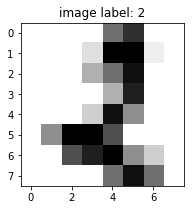

In [4]:
sample_index = 75
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

# Preprocessing
1. normalization
2. train/test split

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

#print(X_train[:3])
# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#print(scaler.mean_)
#print(scaler.scale_)

#### Let's display the one of the transformed sample (after feature standardization):



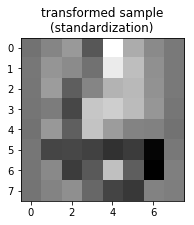

In [6]:
sample_index = 75
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

##### The scaler objects makes it possible to recover the original sample

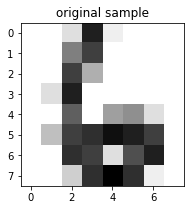

In [7]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1527, 64) (1527,)
(270, 64) (270,)


#### Feed Forward NN with Keras
###### Objectives of this section
1. Experiment with different optimizers, activations, size of layers, initializations
2. Keras Workflow
3. To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [9]:
y_train[:3]

array([2, 9, 5])

#####  Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [10]:

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
from keras.activations import softmax

def softMaxAxis1(x):
    return softmax(x,axis=1)

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))
#model.add(Dense(output_dim=N, activation='softmax(x, axis=1)'))

#model.add(Dense(output_dim=N, activation=softMaxAxis1))


model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 0s 117us/step - loss: 0.7800 - acc: 0.8042
Epoch 2/15
1527/1527 [==============================] - 0s 43us/step - loss: 0.2814 - acc: 0.9365
Epoch 3/15
1527/1527 [==============================] - 0s 36us/step - loss: 0.1947 - acc: 0.9594
Epoch 4/15
1527/1527 [==============================] - 0s 29us/step - loss: 0.1531 - acc: 0.9686
Epoch 5/15
1527/1527 [==============================] - 0s 36us/step - loss: 0.1263 - acc: 0.9764
Epoch 6/15
1527/1527 [==============================] - 0s 30us/step - loss: 0.1075 - acc: 0.9810
Epoch 7/15
1527/1527 [==============================] - 0s 39us/step - loss: 0.0945 - acc: 0.9843
Epoch 8/15
1527/1527 [==============================] - 0s 27us/step - loss: 0.0833 - acc: 0.9856
Epoch 9/15
1527/1527 [==============================] - 0s 44us/step - loss: 0.0748 - acc: 0.9869
Epoch 10/15
1527/1527 [==============================] - 0s 33us/step - loss: 0.0678 - acc: 0.9889
Epoch 11/15
1527/1